# Загрузка и просмотр данных

In [136]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('DSB_Day1_Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [138]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85          C           1
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123         S           1
7            0         1       McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46          S           1
11           1         3       Sandstrom, Miss. Marguerite Rut                      female  4.0   1      1      PP 9549   16.7000  G6           S           1
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103         S           1
                                                         

# Смотрим, какие данные есть, проверяем на пустые значени 

In [139]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [140]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Аналитика

## Зависимость от пола

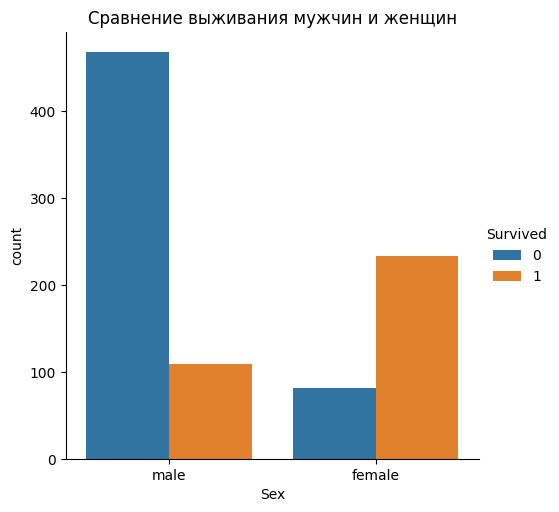

In [142]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.title("Сравнение выживания мужчин и женщин")
plt.show()

Женщины выживали намного чаще мужчин

## Зависимость от возраста

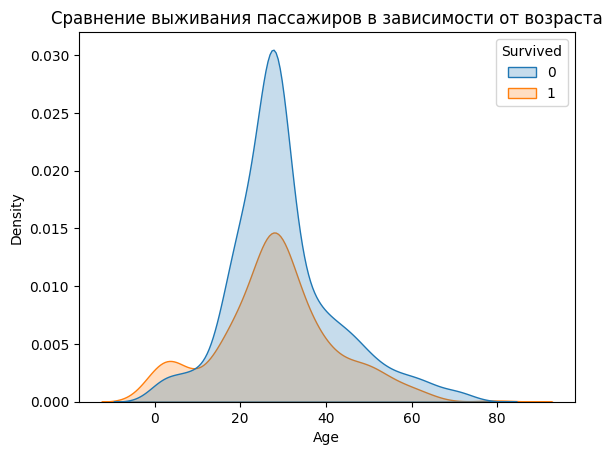

In [143]:
df['Age'] = df['Age'].fillna(df['Age'].median())

sns.kdeplot(data=df, x="Age", hue="Survived", fill=True)
plt.title("Сравнение выживания пассажиров в зависимости от возраста")
plt.show()

Дети имели самы большие шансы выжить

## Зависимость от класса

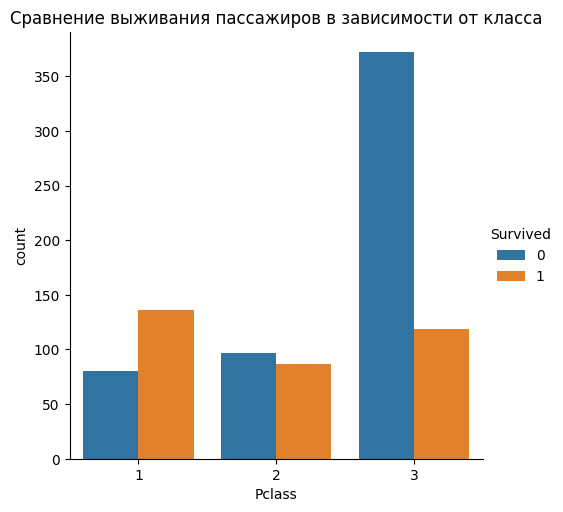

In [144]:
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df)
plt.title("Сравнение выживания пассажиров в зависимости от класса")
plt.show()

В 1 классе шанс выжить >50%  
Во 2 ~50%  
В 3 <<50%

## Зависимость от порта

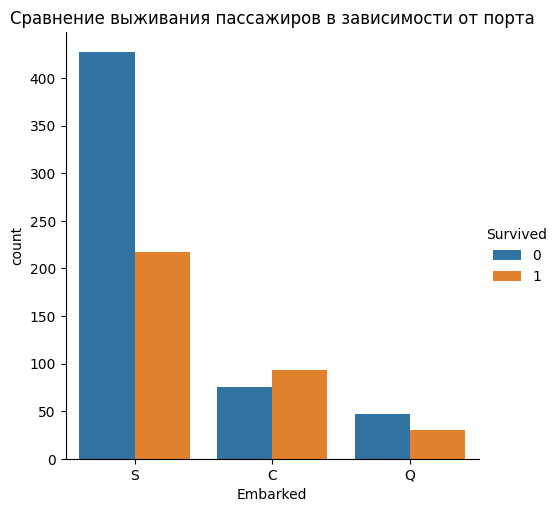

In [145]:
sns.catplot(x="Embarked", hue="Survived", kind="count", data=df)
plt.title("Сравнение выживания пассажиров в зависимости от порта")
plt.show()

Люди севшие в порте C имели большие шансы

### Зависимость от количества членов семьи

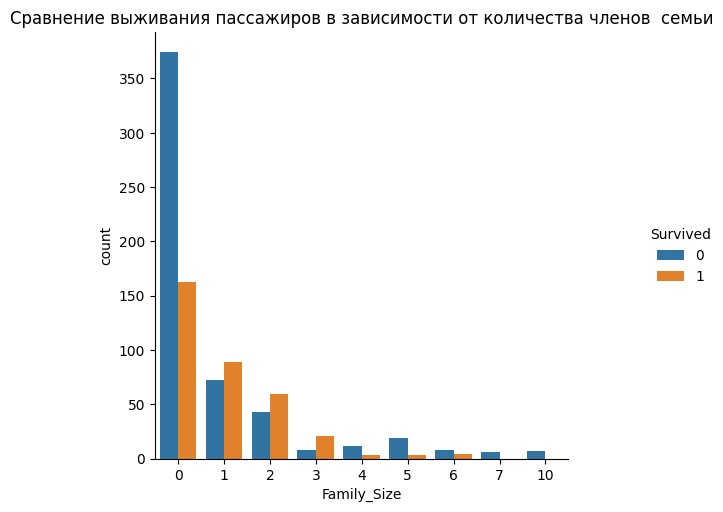

In [146]:
df['Family_Size'] = df['SibSp'] + df['Parch']

sns.catplot(x="Family_Size", hue="Survived", kind="count", data=df)
plt.title("Сравнение выживания пассажиров в зависимости от количества членов  семьи")
plt.show()

Люди с семьей из одного,двух или трёх человек выживали значительно чаще других

## Зависимость от платы

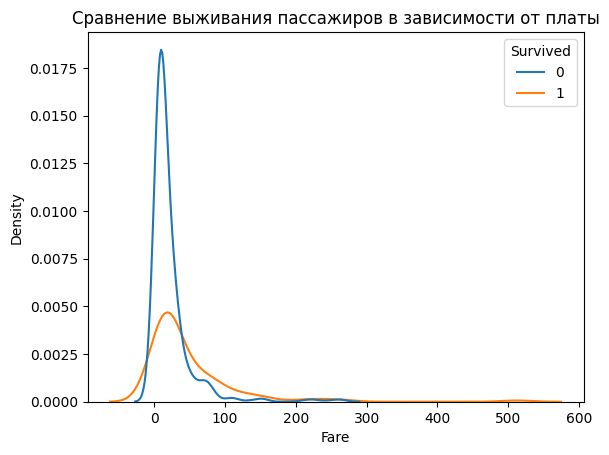

In [147]:
sns.kdeplot(x="Fare", hue="Survived", data=df)
plt.title("Сравнение выживания пассажиров в зависимости от платы")
plt.show()

Чем выше плата за билет, тем больше шанс выжить, этио частично объясняется классом обслуживания

## Зависимость от статуса

In [148]:
df['Status']  = df['Name'].map(lambda x: re.sub(r".*(M[A-z]{,3}|Rev|Dr|Major|Master|Lady|Sir|Col|Capt|Countess|Don|Jonkheer)\..*", r"\1", x))

In [149]:
df['Status'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

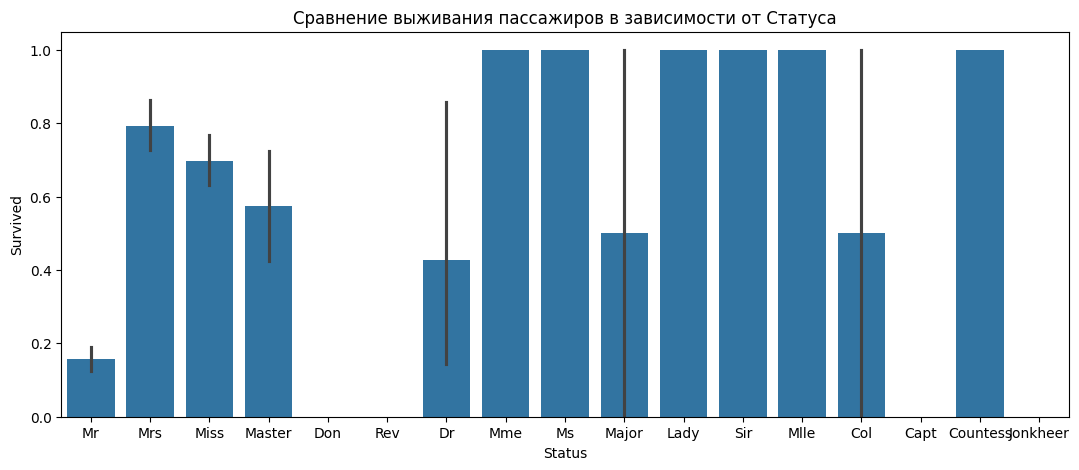

In [150]:
plt.figure(figsize=(13, 5))
sns.barplot(data=df, x='Status', y='Survived')
plt.title("Сравнение выживания пассажиров в зависимости от Статуса")
plt.show()

Высокий статус так же коррелирует с дорогими билетами и высоким классом обслуживания, как следствие, с шансом выжить

### Количество пассажиров в зависимости от Статуса

In [151]:
df.groupby("Status").agg(count=("Name", "count")).sort_values("count", ascending=False)

,count
Status,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


# Feature Engineering

Так как Family_Size = SibSp + Parch, они сильно коррелируют, поэтому мы уберем эти две колонки

### Создаем колонку с размером семьи

In [152]:
df['Family_Size'] = df['SibSp'] + df['Parch']

### Удаляем  
PassengerId - нумерация пассажиров, ничего не значит  
Name - т.к. уже достали статус из имени  
Cabin - Из 890 записей, всего 204 имеют заполненый столбец Cabin, слишком мало данных  

  Так же есть проблема с билетами и их значением, попробуем составить 2 модели: с билетами и без

In [153]:
df = df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [154]:
def encode_series(le, series):
    series = le.fit_transform(series)

In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Status'] = le.fit_transform(df['Status'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Ticket'] = le.fit_transform(df['Ticket'])

In [156]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Status
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.163517,0.016639,-0.201345
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.157112,0.065997,0.045541
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.104057,-0.200988,0.256407
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.014205,-0.245619,0.272384
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.066654,0.890712,-0.191786
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.038322,0.783111,-0.119721
Ticket,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.006041,0.064302,0.025176
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.221226,0.217138,-0.086359
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.006041,-0.221226,1.000000,0.064701,0.065899
Family_Size,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.064302,0.217138,0.064701,1.000000,-0.190890


## Заполняем пропуски в возрасте медианным значением

In [157]:
df = df.drop(['Parch', 'SibSp'], axis=1)

In [158]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

In [159]:
{column: df[column].unique() for column in df.drop(['Age', 'Fare'], axis=1).columns}
# Проверка коректности кодировки

{'Survived': array([0, 1]),
 'Pclass': array([3, 1, 2]),
 'Sex': array([1, 0]),
 'Ticket': array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
        333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
         95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
        507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
        239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
        553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
        304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
        428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
        254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
        463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
        203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
        573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
          5, 659,  90, 412, 488, 5

# Создание модели

In [160]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [161]:
def get_model1():
    model = Sequential()
    model.add(Dense(64, activation='leaky_relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1,activation = 'sigmoid' ))
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [162]:
def get_model2():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [163]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/32


C:\Users\SystemX\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6870 - loss: 0.6613 - val_accuracy: 0.7972 - val_loss: 0.5814
Epoch 2/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7777 - loss: 0.5859 - val_accuracy: 0.8322 - val_loss: 0.5149
Epoch 3/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7882 - loss: 0.5500 - val_accuracy: 0.8671 - val_loss: 0.4730
Epoch 4/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8017 - loss: 0.5115 - val_accuracy: 0.8601 - val_loss: 0.4454
Epoch 5/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7975 - loss: 0.4883 - val_accuracy: 0.8671 - val_loss: 0.4274
Epoch 6/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8050 - loss: 0.4563 - val_accuracy: 0.8601 - val_loss: 0.4161
Epoch 7/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7851 - loss: 0.4665 - val_accuracy: 0.8811 - val_loss: 0.4085
Epoch 8/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8041 - loss: 0.4674 - val_accuracy: 0.8671 - val_loss: 0.4028
Ep

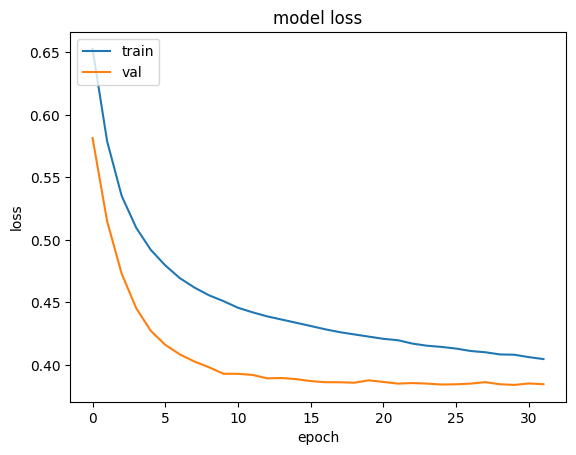

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
model = get_model1()
history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5983 - loss: 0.6821 - val_accuracy: 0.4825 - val_loss: 0.6927
Epoch 2/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5683 - loss: 0.6889 - val_accuracy: 0.6294 - val_loss: 0.6812
Epoch 3/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5841 - loss: 0.6895 - val_accuracy: 0.6923 - val_loss: 0.6663
Epoch 4/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6230 - loss: 0.6809 - val_accuracy: 0.7133 - val_loss: 0.6513
Epoch 5/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6408 - loss: 0.6573 - val_accuracy: 0.7483 - val_loss: 0.6381
Epoch 6/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6629 - loss: 0.6660 - val_accuracy: 0.7902 - val_loss: 0.6273
Epoch 7/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6458 - loss: 0.6499 - val_accuracy: 0.8042 - val_loss: 0.6198
Epoch 8/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6744 - loss: 0.6494 - val_accuracy: 0.7972 - val_loss: 0.6143
Epoch 

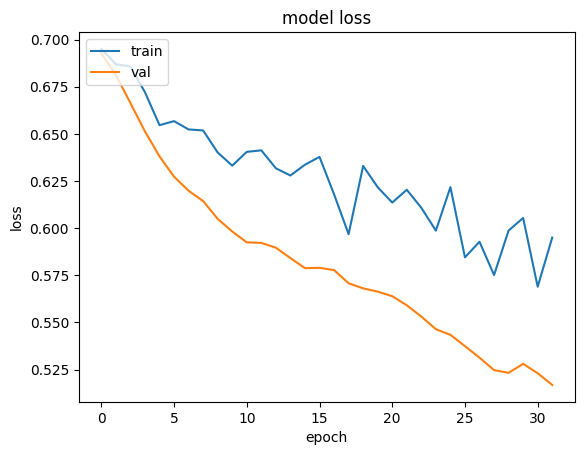

In [165]:
model = get_model2()
history = model.fit(X_train, y_train, epochs=32, batch_size=64, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Первая модоель показала себя лучше и дальше рассматривается она

# Кросс-валидация 

In [166]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = get_model1()
history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)


kf = KFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []
losses = []
confusion_matrices = []
X1 = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
for train_index, test_index in kf.split(X):
    
    # Use iloc for integer-based indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    history = model.fit(X_train, y_train, 
                        epochs=32, batch_size=32, 
                        validation_data=(X_test, y_test),
                        verbose=0)
    y_pred = model.predict(X_test)    
    if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
        best_pred = y_pred
    accuracies.append(history.history['val_accuracy'][-1])
    losses.append(history.history['val_loss'][-1])

    # Create the confusion matrix
    conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
    confusion_matrices.append(conf_matrix)
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate and print accuracy, precision, recall, F1-score
    print("\nClassification Report:")
    print(classification_report(y_test, (y_pred > 0.5).astype(int)))
best_model_index = np.argmax(accuracies)
print(f"Best model index: {best_model_index}")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(accuracies):.4f}")
print(f"Average Loss: {np.mean(losses):.4f}")
print(f"Standard Deviation of Loss: {np.std(losses):.4f}")

Epoch 1/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6404 - loss: 24.5767 - val_accuracy: 0.6713 - val_loss: 12.9922
Epoch 2/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6276 - loss: 10.6801 - val_accuracy: 0.4056 - val_loss: 6.0549
Epoch 3/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4850 - loss: 5.3758 - val_accuracy: 0.6434 - val_loss: 3.2340
Epoch 4/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5902 - loss: 2.6591 - val_accuracy: 0.6923 - val_loss: 2.1941
Epoch 5/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6314 - loss: 1.7409 - val_accuracy: 0.6783 - val_loss: 1.3409
Epoch 6/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6520 - loss: 1.0298 - val_accuracy: 0.6993 - val_loss: 0.9088
Epoch 7/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6177 - loss: 0.8477 - val_accuracy: 0.5105 - val_loss: 0.9272
Epoch 8/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6034 - loss: 0.8556 - val_accuracy: 0.7133 - val_l

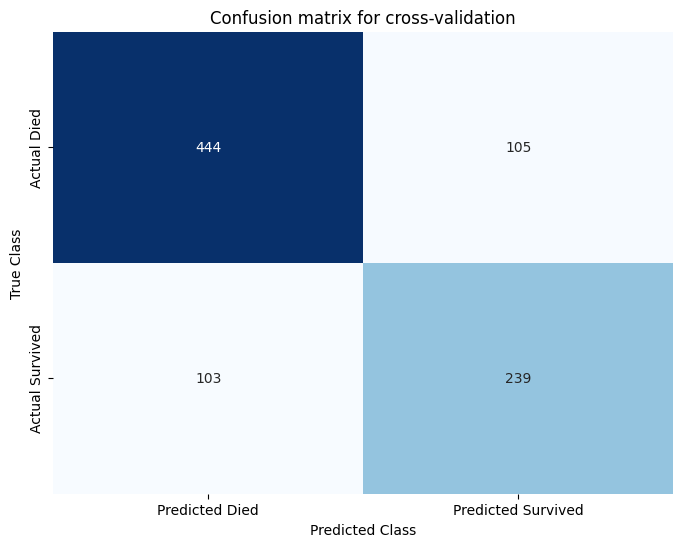

In [167]:
total_confusion_matrix = np.sum(confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion matrix for cross-validation')
plt.show()

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
    best_pred = y_pred
accuracies.append(history.history['val_accuracy'][-1])
losses.append(history.history['val_loss'][-1])

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy, precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))
tn, fp, fn, tp = conf_matrix.ravel()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[83 22]
 [13 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       105
           1       0.73      0.82      0.78        74

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179



## №1 Кросс-валидация с билетами

In [169]:
dict = classification_report(y_test, (y_pred > 0.5).astype(int), output_dict=True)
print(dict)
print(f"tn: {tn} \nfp: {fp}\nfn: {fn}\ntp: {tp} \n")

{'0': {'precision': 0.8645833333333334, 'recall': 0.7904761904761904, 'f1-score': 0.8258706467661692, 'support': 105.0}, '1': {'precision': 0.7349397590361446, 'recall': 0.8243243243243243, 'f1-score': 0.7770700636942676, 'support': 74.0}, 'accuracy': 0.8044692737430168, 'macro avg': {'precision': 0.7997615461847389, 'recall': 0.8074002574002574, 'f1-score': 0.8014703552302184, 'support': 179.0}, 'weighted avg': {'precision': 0.810987665746786, 'recall': 0.8044692737430168, 'f1-score': 0.8056961040437071, 'support': 179.0}}
tn: 83 
fp: 22
fn: 13
tp: 61 



## №2 Кросс-валидация без билетов

Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179  62 

## Итог кросс-валидации

Кросс-валидация без билетов показала результат значительно хуже, следовательно билеты имеют значение при рассмотрении выживания пассажиров

# Вывод

Мы провели анализ датафрэйма и провели feature engineering, проверили важность билетов. Составили несколько моделей и выбрали лучшую, получив итоговую точность в f1 0.83.
Полученная модель имеет хорошие графики  потерь с постоянным уменьшением, что говорит о её способности предсказывать результаты с хорошей точностью.